## Initial Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipdb
from pylab import *
import pprint
import sys

## Reading Data

In [2]:
data = pd.read_csv("../input_data/AdmissionDataset/data.csv")

In [16]:
# y = data.iloc[:, :-1].values
# x = list(range(1, len(y)+1))

In [17]:
# plt.title("Italy Active", fontsize=18)
# plt.plot(x,y,color='r',lw=3)
# plt.grid(True)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# plt.xlabel("Days",fontsize=15)
# plt.ylabel("Active",fontsize=15)
# plt.show()

In [18]:
# removing last two columns as their values are in the range [0, 1]
normalized_data = data.iloc[:, :-2]

In [3]:
# remove "Serial No." column
normalized_data.drop(['Serial No.'], axis = 1, inplace = True)

normalized_data = (normalized_data - normalized_data.mean())/normalized_data.std()

# Append the last two columns again
normalized_data[["Research", "Chance of Admit"]] = data[["Research", "Chance of Admit"]]

In [4]:
Class = "Chance of Admit"

## Part-1

In [5]:
# Assign all the attributes columns as a matrix to X
X = normalized_data.iloc[:, :-1]

# Concatenate an array of ones to X
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

# Assign the last column to Y.
Y = np.array([normalized_data.iloc[:, -1].values]).T    # .T for transpose

# Learning rate
alpha = 0.01

In [6]:
def mse(X, Y, theta):
    errors = (X @ theta.T) - Y
    square_errors = np.power(errors, 2)
    return errors, square_errors, (np.sum(square_errors) / (2 * len(X)))

In [7]:
def mae(X, Y, theta):
    errors = (X @ theta.T) - Y
    abs_errors = abs(errors)
    return errors, abs_errors, (np.sum(abs_errors) / (len(X)))

In [8]:
def mpe(X, Y, theta):
    errors = (X @ theta.T) - Y
    perc_errors = 100 * (abs((X @ theta.T) - Y) / Y)
    return errors, perc_errors, np.sum(perc_errors) / (len(X))

In [9]:
def gradient_descent(X, Y, theta, nIterations, alpha):
    cost = []
    for i in range(nIterations):
        theta = theta - (alpha/len(X)) * (np.array([np.sum((X * (X @ theta.T - Y)), axis = 0)]))
        cost.append(mse(X, Y, theta)[2])
    return theta, cost

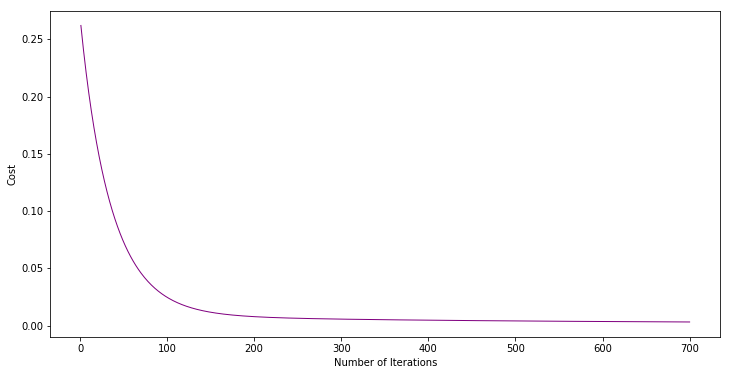

In [177]:
# Initialize theta as an array of zeros.
theta = np.zeros([1,X.shape[1]])

nIterations = 700
theta, cost = gradient_descent(X, Y, theta, nIterations, alpha)

x = list(range(1, nIterations+1))
y = cost

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, y, color="purple", lw=1, ls='-');

plt.ylabel("Cost")
plt.xlabel("Number of Iterations")
plt.show()

## Part-2

In [178]:
errors, square_errors, MSE = mse(X, Y, theta)
errors, abs_errors, MAE = mae(X, Y, theta)
errors, abs_perc_errors, MPE = mpe(X, Y, theta)

In [179]:
mean_losses = pd.DataFrame(columns=['MSE', 'MAE', 'MPE'])
mean_losses.append(pd.DataFrame([[MSE, MAE, MPE]], columns=['MSE', 'MAE', 'MPE'])).style.hide_index()

MSE,MAE,MPE
0.00322504,0.0603366,9.41471


Taking the square root of the average squared errors has some interesting implications for MSE. <br>
Since the errors are squared before they are averaged, the MSE gives a relatively high weight to large errors. <br>
Here, since the predicted and actual values are within the range of [0. 1], the error is also with [0, 1]. <br>
Thus, MSE is smaller than MAE.

### Square Loss vs Absolute Loss

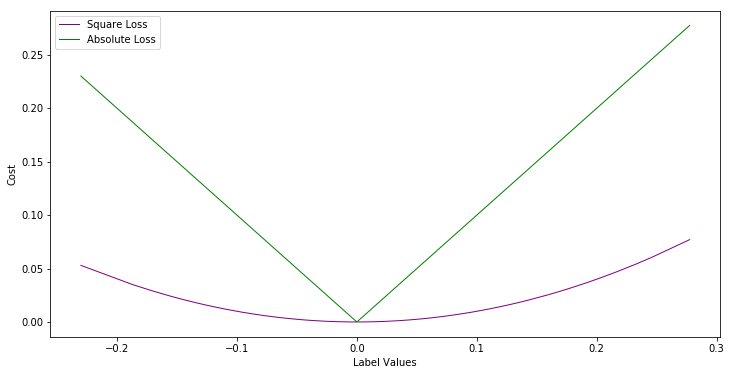

In [180]:
arr = np.concatenate((errors, square_errors), axis=1)
arr = arr[arr[:,0].argsort()]

x = arr[:,0]
y = arr[:,1]

fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, y, color="purple", lw=1, ls='-', label='Square Loss');

arr = np.concatenate((errors, abs_errors), axis=1)
arr = arr[arr[:,0].argsort()]

x = arr[:,0]
y = arr[:,1]

ax.plot(x, y, color="green", lw=1, ls='-', label='Absolute Loss');

plt.ylabel("Cost")
plt.xlabel("Label Values")
plt.legend()
plt.show()

## Part-3

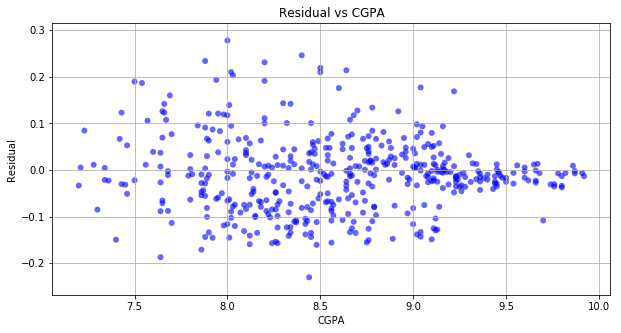

In [181]:
residual = (X @ theta.T - Y)

attr_values = data["CGPA"]
fig, ax = plt.subplots(figsize=(10,5))
x = attr_values
y = residual
ax.scatter(x, y, c='blue', alpha=0.6, edgecolors='none')

ax.grid(True)
plt.title("Residual vs CGPA")
plt.xlabel("CGPA")
plt.ylabel("Residual")
plt.show()

We want to determine whether the residuals are consistent with random error. If we look at a series of residuals, it should look random.<br>
Next, we check that they are randomly scattered around zero for the entire range of fitted values. When the residuals center on zero, they indicate that the model’s predictions are correct on average rather than systematically too high or low. Regression also assumes that the residuals follow a normal distribution